# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Pada proyek ini kami mencoba untuk mengambil data penjualan ethereum (mata uang kripto) dari situs web Coin Gecko. CoinGecko adalah situs web yang menyediakan analisis fundamental pasar mata uang digital. Saya akan mencoba mengambil data pada situs ini hanya untuk tujuan proyek batu penjuru.

Banyak dari Anda mungkin bertanya mengapa kami perlu menghapus data ini dari situs sementara itu sudah memiliki visualisasi yang cukup baik. Katakanlah kita memiliki tugas untuk membuat perkiraan tingkat inflasi Indonesia. Untuk melakukan itu kita perlu memiliki data, dan memo

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

## Requirements
- Beatifulsoup
- pandas
- matplotlib

In [192]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [193]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [194]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Karena kita perlu menemukan nilainya secara langsung, kita perlu menemukan kepala grup data yang langsung mengarah ke data tanpa mendapatkan nama kolom, yang dalam hal ini adalah tbody

In [195]:
table = soup.find('tbody') #mengambil semua bagian termasuk isi yang akan di ambil
print(table.prettify()[1:500]) #memunculkan semua dalam bentuk tabel, 500 kata

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text-center">
   $1,311.26
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="tex


In [196]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>,
 <th class="font-semibold text-center" scope="row">2022-09-28</th>]

In [197]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-10-02'

Finding row length.

In [215]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'}) 
row_length = len(row)
row_length

31

In [216]:
row = table.find_all('td', attrs={'class':'text-center'}) 
row_length2 = len(row)
row_length2

124

Sekarang, karena data dibagi menjadi dua bagian, kita akan melakukan loop pertama untuk tanggal itu sendiri. untuk bagian kedua, kita akan melakukan perulangan untuk kolom data lainnya. karena jumlah sel bergerak secara horizontal, setiap kolom akan mendapatkan data pada langkah ke-4. oleh karena itu, kami akan menambahkan awal berdasarkan jumlah python (indeks berbasis nol) menjadi 0,1,2,3 untuk kapitalisasi pasar, volume, buka, dan tutup, serta langkah untuk setiap loop adalah 4.

In [189]:
date = []
market_cap = []
volume = []
open = []
close = []

for i in range(0, row_length):
    #getdate
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    date.append(Date)  #to remove excess white space
    
    #get marketcap
for i in range(0, row_length2,4):
    Market_Cap = table.find_all('td', attrs={'class':'text-center'})[i].text
    Market_Cap = Market_Cap.strip() #to remove excess white space
    market_cap.append(Market_Cap)
    
    #get volume
for i in range(1, row_length2,4):
    volumee = table.find_all('td', attrs={'class':'text-center'})[i].text
    volumee = volumee.strip() #to remove excess white space
    volume.append(volumee)
    
     #get open
for i in range(2, row_length2,4):
    openn = table.find_all('td', attrs={'class':'text-center'})[i].text
    openn = openn.strip() #to remove excess white space
    open.append(openn)
    
     #get close
for i in range(3, row_length2,4):   
    closee = table.find_all('td', attrs={'class':'text-center'})[i].text
    closee = closee.strip() #to remove excess white space
    close.append(closee)
        

## Creating data frame & Data wrangling

kita sekarang akan menetapkan setiap hasil perulangan ke dalam df dan memberi nama untuk setiap perulangan yang kita miliki.

In [220]:
import pandas as pd

df = pd.DataFrame({
    'Date' : date,
    'Market_cap' : market_cap,
    'Volume' : volume,
    'Open' : open,
    'Close' : close
}, columns = ['Date', 'Market_cap', 'Volume', 'Open', 'Close'])
df.head()

,Date,Market_cap,Volume,Open,Close
0,2022-10-02,"$158,410,068,981","$5,052,407,841","$1,311.26",N/A
1,2022-10-01,"$160,462,955,554","$11,849,125,784","$1,329.15","$1,311.26"
2,2022-09-30,"$161,267,455,734","$11,834,328,252","$1,335.74","$1,329.15"
3,2022-09-29,"$161,716,193,676","$16,571,161,476","$1,340.02","$1,335.74"
4,2022-09-28,"$160,800,122,125","$16,685,874,856","$1,331.15","$1,340.02"


In [201]:
df.dtypes

Date          object
Market_cap    object
Volume        object
Open          object
Close         object
dtype: object

Karena tugas meminta kami untuk hanya menunjukkan pergerakan volume Ethereum, kami sekarang hanya akan mengambil 2 kolom data, yaitu Tanggal dan Volume

In [202]:
df_dv = df[['Date', 'Volume']]
df_dv.head()

,Date,Volume
0,2022-10-02,"$5,052,407,841"
1,2022-10-01,"$11,849,125,784"
2,2022-09-30,"$11,834,328,252"
3,2022-09-29,"$16,571,161,476"
4,2022-09-28,"$16,685,874,856"


Sekarang, kita akan menghapus tanda $ dan , dengan memasukkan sebuah fungsi

In [206]:
def delete_dollar(x):
    for i in x:
        xx = i.split('$')
        return int(xx[1].replace(',',''))

In [207]:
df_dv['Volume'] = df_dv[['Volume']].apply(delete_dollar,axis=1)

C:\Users\Kevin Alfandara(PC)\AppData\Local\Temp\ipykernel_1432\443765963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dv['Volume'] = df_dv[['Volume']].apply(delete_dollar,axis=1)


Sebelum masuk ke visualisasi, kita perlu mengimpor matplotlib terlebih dahulu (harus) dan mengatur gaya (opsional)

In [208]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [209]:
df_dv = df_dv[::-1].set_index('Date')

In [210]:
df_dv.dtypes

Volume    int64
dtype: object

Dan inisialisasi visualisasi menggunakan .plot

<AxesSubplot:xlabel='Date'>

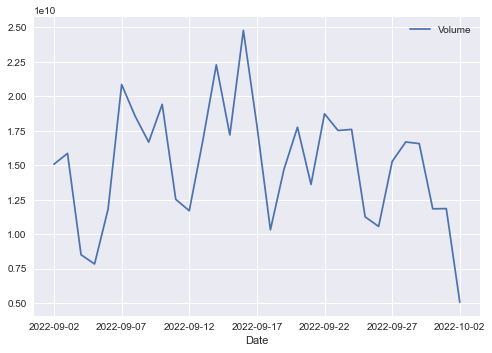

In [211]:
df_dv.plot()

kita dapat meningkatkan visualisasi dengan memberinya judul serta memberi nama sumbu y sebagai Volume Ethereum Traded

<AxesSubplot:title={'center':'        Volume Ethereum diperdagangkan 2 September 2022 - 2 October 2022'}, xlabel='Date', ylabel='Volume Ethereum Traded'>

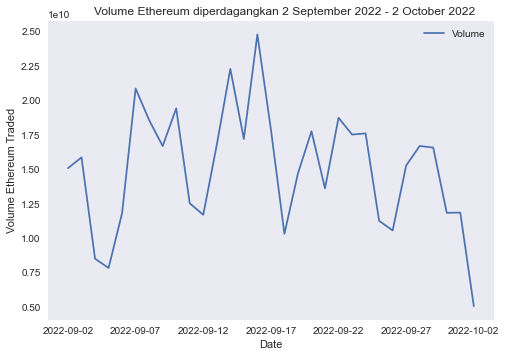

In [221]:
df_dv.plot(kind='line',
        ylabel='Volume Ethereum Traded',
        xlabel='Date',
        title='\
        Volume Ethereum diperdagangkan 2 September 2022 - 2 October 2022',
        grid=False,
        rot=0)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Pertama yang bisa Anda lakukan mulai dengan membuat visualisasi data.

Pergerakan Volume Ethereum antara 2 September 2022 hingga 2 Oktober 2022 (Perhatikan bahwa tanggal berbeda dari tugas yang diberikan yang harus dimulai pada 1 Januari 2020 hingga 30 Juni 2021 adalah karena tanggal yang diberikan dalam tugas tidak dapat diakses.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.